# Foundations of Data Mining: Assignment 4

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [50]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all"

## Backpropagation (3 points)

Figure 1 illustrates a simple neural network model.

![Figure 1](images/assignment/small-net.png)

It has single input $x$, two layers with one neuron each. The activation function of both layers is ReLU. 

The parameters $w_0$ and $w_1$ (no biases) are initialized to the following values $w_0 = 1$ and $w_1 = 2$. Implement a single update step of the gradient descent algorithm by hand. Run the update state for the following two data points:

* $(1, 2)$ 
* $(2, 3)$

The goal is to model the relationship between two continuous variables. The learning rate is set to $0.1$

Provide the solution in the following format:

- A choice for a loss function 
- Compute graph for training the neural network
- Partial derivative expression for each of the parameters in the model
- The update expression for each of the parameters for each of the data-points
- The final value of both parameters after the single step in the gradient descent algorithm



- loss function: MSE
- Compute graph: 
    
    

## Training Deep Models (3 points)

The model in the example code below performs poorly as its depth increases. Train this model on the MNIST digit detection task. 

Examine its training performance by gradually increasing its depth:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Modify the model such that you improve its performance when its depth increases. Train the new model again for the different depths:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers


In [2]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
nb_epoch = 10

Using TensorFlow backend.


In [3]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [4]:
# Use this parameter to change the depth of the model
number_hidden_layers = 1  # Number of hidden layers

In [45]:
acc_results = []
valacc_results = []

for layer in range(1,4):  
    number_hidden_layers = layer
    # Model
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation('sigmoid'))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1


    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    # Training (You don't need to change this part of the code)
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    acc_results.append(history.history['acc'])
    valacc_results.append(history.history['val_acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 2.0181 - acc: 0.3463 - val_loss: 1.6341 - val_acc: 0.7296
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 1.4710 - acc: 0.

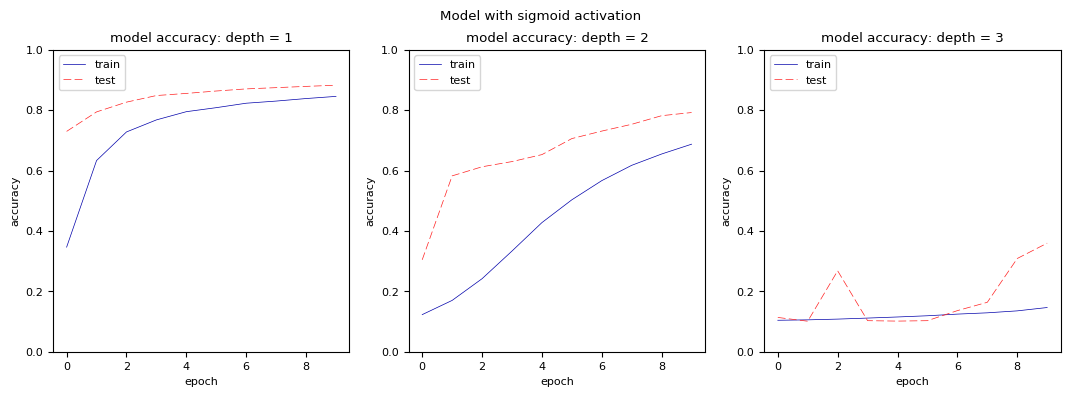

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
fig.suptitle('Model with sigmoid activation')

for ax, k, result in zip(axes, ['depth = 1','depth = 2','depth = 3'], range(0,3)):
    ax.plot(acc_results[result])
    ax.plot(valacc_results[result])    
    ax.set_title('model accuracy: '+k)
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left') 
    ax.set_ylim([0,1])

In [41]:
acc_relu = []
valacc_relu = []

# now try with different activation functions
for layer in range(1,4):  
    number_hidden_layers = layer
    # Model
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='relu'))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1


    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    # Training (You don't need to change this part of the code)
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    #plt.plot(history.history['acc'])
    acc_relu.append(history.history['acc'])
    
    #plt.plot(history.history['val_acc'])
    valacc_relu.append(history.history['val_acc'])
    
    #plt.title('model accuracy')
    #plt.ylabel('accuracy')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s - loss: 1.1182 - acc: 0.7361 - val_loss: 0.5950 - val_acc: 0.8684
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 0.5460 - acc: 0.

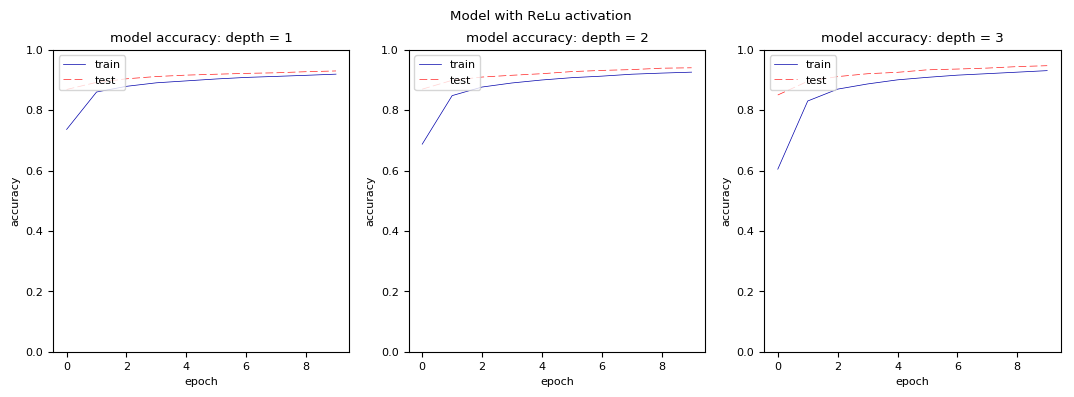

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
fig.suptitle('Model with ReLu activation')

for ax, k, result in zip(axes, ['depth = 1','depth = 2','depth = 3'], range(0,3)):
    ax.plot(acc_relu[result])
    ax.plot(valacc_relu[result])    
    ax.set_title('model accuracy: '+k)
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left') 
    ax.set_ylim([0,1])

Submit an explanation for the limitation of the original model. Explain your modification. 

The problem the original model faces when depth increases is the \textbf{vanishing gradient problem}. Basically, the speed of learning drops heavily in the earlier layers resulting in a model that cannot learn well from the inputs. Because the gradients get so small, even a large difference in inputs does not result in a (significant) change in outputs. 

This problem arises from the choice of activation function. The 'Sigmoid' function is used, and to understand what goes wrong we need to look at the gradients. 


## Convolutional Neural Networks for Filtering (2 points)

Convolutional neural networks are well suited for analyzing images. They can be used to apply various image filtering operations. 

The goal of this exercise is to design a CNN model that applies 2 filters to its input images. The input images are 128x128 RGB color images, encoded as 128x128x3 tensor with floating point value normalized between 0 and 1. The RGB format is such that the pixels address by: [:, :, 0] encode the red pixels of the image, the pixels addressed by [:, :, 1] define the green pixels and pixels addressed by [:, :, 2] define the blue pixels. 

Design a convolutional neural network that will: 
1. Apply the sepia filter to the image
2. Apply Gaussian smoothing to the image

Use the specification of the sepia and the Gaussian filter below. 

You answer should contain:
    - The definition of the architecture of the CNN
        - Number of layers
        - Number of filters per layer
        - Shape of the filter per layer
    - Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter
    - The dimensions of the output image when a 5x5 Gaussian smothing is applied


The sepia effect gives warmth and a feel of vintage to photographs. The sepia filter is defined as:

\begin{equation}
R_o = (R_i * .393) + (G_i *.769) + (B_i * .189)\\
G_o = (R_i * .349) + (G_i *.686) + (B_i * .168)\\
B_o = (R_i * .272) + (G_i *.534) + (B_i * .131)
\end{equation}

Gaussian blurring is an effect that reduces the noise and details in an image. 
Gaussian smoothing filter:
$$G(x, y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

- A discretized version of the filter is given by the following table:

<table>
<tr><td>1</td><td>4</td><td>7</td><td>4</td><td>1</td></tr>
<tr><td>4</td><td>16</td><td>26</td><td>16</td><td>4</td></tr>
<tr><td>7</td><td>26</td><td>41</td><td>26</td><td>7</td></tr>
<tr><td>4</td><td>16</td><td>26</td><td>16</td><td>4</td></tr>
<tr><td>1</td><td>4</td><td>7</td><td>4</td><td>1</td></tr>
</table>


- To normalize the filter response, each value should divided by $273$. This is a truncated discretized Gaussian filter with a $\sigma$ of 1.


    - The definition of the architecture of the CNN
        - Number of layers
        
        2 layers
        
        - Number of filters per layer
        
        1 per layer
        
        - Shape of the filter per layer
        
        first layer: 1x1x3
        second layer: 5x5x3
        
    - Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter
    
    first filter: 
    neuron 1 weights of the filter: [.393 .769 0.189] 
    neuron 2 weights of the filter: [.349 .686 0.168]
    neuron 3 weights of the filter: [.272 .534 0.131]
    
    second filter: 5x5x3 
    3 neurons. every neuron has 75 weights. 
    neuron 1 will gaussian RED color: 25 weights: 5x5 with the filter values / 273, the two dimensions (50 weigths) behind it 0
    
    neuron 2 will gaussian Blue color: 5x5 0, then 5x5 with filter values /273, then again 5x5 0
    
    neuron 3 will gaussian Blue color: 5x5 0, 5x5 0, then 5x5 with filter values /273    
    
    - The dimensions of the output image when a 5x5 Gaussian smothing is applied
    Note that all filters will produce a weighted sum over the filterarea. The dimensions of the output image will be a 124 times 124 times 3 'image'. 

## Model Design (2 Points)

Various decisions need to be made in a modeling process to address specific properties of the data and the modeling goal. In this task, you are given a description of a data structure and a goal for which you need to design a model. 

Produce a figure depicting your model. Briefly explain the figure and justify all decisions made in the modeling process. In detail, describe at least: 
- Input data format
- Number of layers
- Type of layers (Dense, Recurrent, Convolutional - 1D, 2D, 3D)
- Regularization
- Model output ----- caption? 
- Loss function  ---- 0/1 loss


The training and execution procedures for the model may differ, so you can use different descriptions for both. 

*Data and goal description:*

The goal of this task is to generate captions for short video clips. 

The video data is structured as sequences of color images. The model needs to be able to process a number of consecutive images that form a short video clip. The training data consists of video clips (few seconds) and a short caption (5-10 words). 

For simplicity, the accuracy of the model is evaluated on the exact prediction of the caption. In other words, the model needs to produce correctly the specific words in a specific order for each video. 

## MNIST Calculator (5 points)

During the lectures you have seen a CNN model that can be successfully trained to classify the MNIST images. You have also seen how a RNN model that can be trained to implement addition of two numbers. 

Using the KERAS (or TensorFlow) library, design and train a model that can learn how to add numbers directly from the MNIST image data. More specifically, the model should input a sequence of a set of images and produces a cumulative sum of the numbers represented by the digits in the images.

For example:

Input 1: ![294](images/294.png)

Input 2: ![61](images/61.png)

Output: 355




In [7]:
## Imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Input, TimeDistributed
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

class CharacterTable(object):
    '''
    Given a set of characters:
    + Encode them to a one hot integer representation
    + Decode the one hot integer representation to their character output
    + Decode a vector of probabilities to their character output
    '''
    def __init__(self, chars, maxlen):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))
        self.maxlen = maxlen

    def encode(self, C, maxlen=None):
        maxlen = maxlen if maxlen else self.maxlen
        X = np.zeros((maxlen, len(self.chars)))
        for i, c in enumerate(C):
            X[i, self.char_indices[c]] = 1
        return X

    def decode(self, X, calc_argmax=True):
        if calc_argmax:
            X = X.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in X)

# Training parameters
batch_size = 128
num_classes = 10
epochs = 1


#
#
# Data preparation
# 
#

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Index_train = []
Index_test = []
for i in range(0,6):
    temp = np.random.choice(len(x_train), len(x_train), replace = False)
    temp2 = np.random.choice(len(x_test), len(x_test), replace = False)
    Index_train.append(temp)
    Index_test.append(temp2)
    
# create arrays of 2x3 = 6 images form the MNIST dataset. 
xtrain =  np.array([x_train[Index_train[0]], x_train[Index_train[1]], x_train[Index_train[2]], x_train[Index_train[3]], x_train[Index_train[4]], x_train[Index_train[5]]])
ytrain =  np.array([y_train[Index_train[0]], y_train[Index_train[1]], y_train[Index_train[2]], y_train[Index_train[3]], y_train[Index_train[4]], y_train[Index_train[5]]])

xtest =  np.array([x_test[Index_test[0]], x_test[Index_test[1]], x_test[Index_test[2]], x_test[Index_test[3]], x_test[Index_test[4]], x_test[Index_test[5]]])
ytest =  np.array([y_test[Index_test[0]], y_test[Index_test[1]], y_test[Index_test[2]], y_test[Index_test[3]], y_test[Index_test[4]], y_test[Index_test[5]]])

# convert class vectors to binary class matrices
y_train_cnn = np.zeros((6,60000,10))
y_test_cnn = np.zeros((6,10000,10))
for i in range(0,6):
    y_train_cnn[i] = keras.utils.to_categorical(ytrain[i], num_classes)
    y_test_cnn[i] = keras.utils.to_categorical(ytest[i], num_classes)

y_train = np.swapaxes(y_train_cnn,0,1)
y_test = np.swapaxes(y_test_cnn,0,1)

x_train = np.swapaxes(xtrain,0,1)
x_test = np.swapaxes(xtest,0,1)

# prepare for cnn
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Creation of final_y for RNN
y_train_final = np.zeros((60000))
y_test_final = np.zeros((10000))

for i in range(0,60000):
    y_train_final[i] = int(ytrain[0,i]*100+ytrain[3,i]*100+ytrain[1,i]*10+ytrain[4,i]*10+ytrain[2,i]+ytrain[5,i])

for i in range(0,10000):
    y_test_final[i] = int(ytest[0,i]*100+ytest[3,i]*100+ytest[1,i]*10+ytest[4,i]*10+ytest[2,i]+ytest[5,i])
    
chars = '0123456789'
ctable = CharacterTable(chars, 4)

y_train_final2 = np.zeros((60000, 4, 10))
#create the y's 
for i in range(0, 60000):
    if y_train_final[i]/1000<1:
        temp = '0{}'.format(int(y_train_final[i]))
        #print(temp)
    else:
        temp = '{}'.format(int(y_train_final[i]))
        #print(temp)
    y_train_final2[i]=ctable.encode(temp)

y_test_final2 = np.zeros((10000, 4, 10))
for i in range(0, 10000):
    if y_test_final[i]/1000<1:
        temp = '0{}'.format(int(y_test_final[i]))
        #print(temp)
    else:
        temp = '{}'.format(int(y_test_final[i]))
        #print(temp)
    y_test_final2[i]=ctable.encode(temp)
    
print("done preprocessing")

x_train shape: (60000, 6, 28, 28, 1)
60000 train samples
10000 test samples
done preprocessing


In [9]:
K.set_learning_phase(1)
# CNN model definition

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sequences_input = Input(shape=(6,28,28,1))
process_seq = TimeDistributed(model)(sequences_input)
model = Model(input=[sequences_input], output=process_seq)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Training loop
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/Users/evertjanpeer/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ti...)`


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 543s - loss: 0.3178 - acc: 0.9020 - val_loss: 0.1068 - val_acc: 0.9678
Test loss: 0.105810460305
Test accuracy: 0.966733333302


In [13]:
# RNN model definition
from keras.layers import RepeatVector, recurrent, Activation, TimeDistributed, Dropout
RNN = recurrent.SimpleRNN
HIDDEN_SIZE=128
LAYERS = 2
print('Build model...')
rnn = Sequential()
rnn.add(RNN(HIDDEN_SIZE, input_shape=(6,10)))
rnn.add(RepeatVector(3 + 1))
for _ in range(LAYERS):
    rnn.add(RNN(HIDDEN_SIZE, return_sequences=True))

rnn.add(Dropout(.2))

rnn.add(TimeDistributed(Dense(len(chars))))
rnn.add(Activation('softmax'))

rnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training Loop for RNN
rnn.fit(y_train,y_train_final2,
          batch_size=batch_size,
          epochs=epochs*3,
          verbose=1,
          validation_data=(y_test, y_test_final2))

score = rnn.evaluate(y_test, y_test_final2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Build model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 21s - loss: 1.3750 - acc: 0.4820 - val_loss: 0.5472 - val_acc: 0.8231
Epoch 2/3
60000/60000 [==============================] - 22s - loss: 0.3048 - acc: 0.9123 - val_loss: 0.1821 - val_acc: 0.9521
Epoch 3/3
60000/60000 [==============================] - 21s - loss: 0.1351 - acc: 0.9635 - val_loss: 0.1544 - val_acc: 0.9527
Test loss: 0.157774398899
Test accuracy: 0.951


In [105]:
# Build final model 
print('Build final model...')
Final_model = Sequential()
Final_model.add(model)
Final_model.add(rnn)
Final_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Evaluating performance total model...')
#model is already trained, see how it performs
score = Final_model.evaluate(x_test, y_test_final2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Build final model...
Evaluating performance total model...
10000/10000 [==============================] - 32s    
Test loss: 1.25394978209
Test accuracy: 0.826225


input one:


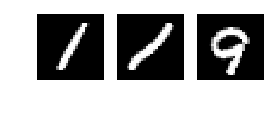

input two:


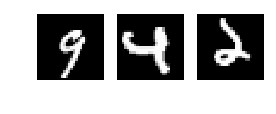

compute sum...
1/1 [==============================] - 0s
computed sum = [[1 0 6 1]]
true sum = 1061

input one:


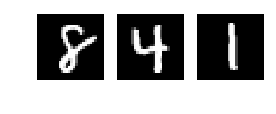

input two:


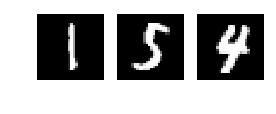

compute sum...
1/1 [==============================] - 0s
computed sum = [[0 9 9 5]]
true sum = 995

input one:


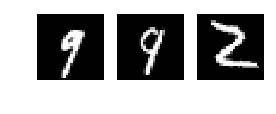

input two:


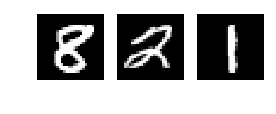

compute sum...
1/1 [==============================] - 0s
computed sum = [[1 9 1 3]]
true sum = 1813



In [104]:
# EG: let's see the first test example 

# show some examples: 

for examples in range(0,3):
    print("input one:")
    for i in range(3):
        plt.subplot(1,6,i+1)
        plt.imshow(x_test[examples][i].reshape((28,28)), cmap='Greys_r')
        plt.axis('off')
    plt.show()

    print("input two:")
    for i in range(3,6):
        plt.subplot(1,6,i+1)
        plt.imshow(x_test[examples][i].reshape((28,28)), cmap='Greys_r')
        plt.axis('off')
    plt.show()

    print("compute sum...")
    print("computed sum = {}".format(Final_model.predict_classes(np.array([x_test[examples]]))))
    print("true sum = {}\n".format(int(y_test_final[examples])))

